### Club Names: Club ID

- Arsenal: 42
- Aston Villa: 66
- Bournemoth: 35
- Brighton: 51
- Burnley: 44
- Chelsea: 49
- Crystal Palace: 52
- Everton: 45
- Fulham: 36
- Leicester: 46
- Liverpool: 40
- Manchester City: 50
- Manchester United: 33
- Newcastle: 34
- Norwich: 71
- Sheffield United: 62
- Southampton: 41
- Tottenham: 47
- Watford: 38
- West Brom: 60
- West Ham: 48
- Wolves: 39

In [51]:
import requests
import pandas as pd
import re

api_token = "97484040a8msh3ccd96d78849797p13932ejsn694ca2b5e880"

epl_url = "https://api-football-v1.p.rapidapi.com/v3/transfers"

headers = {
    "X-RapidAPI-Key": api_token,
    "X-RapidAPI-Host": "api-football-v1.p.rapidapi.com"
}

team_names_to_ids = {
    'Arsenal': 42,
    'Aston Villa': 66,
    'Bournemoth': 35,
    'Brighton': 51,
    'Burnley': 44,
    'Chelsea': 49,
    'Crystal Palace': 52,
    'Everton': 45,
    'Fulham': 36,
    'Leicester': 46,
    'Liverpool': 40,
    'Manchester City': 50,
    'Manchester United': 33,
    'Newcastle': 34,
    'Norwich': 71,
    'Sheffield United': 62,
    'Southampton': 41,
    'Tottenham': 47,
    'Watford': 38,
    'West Brom': 60,
    'West Ham': 48,
    'Wolves': 39
}

transfer_dfs = []

for team_name, team_id in team_names_to_ids.items():
    querystring = {"team": str(team_id)}

    response = requests.get(epl_url, headers=headers, params=querystring)

    if response.status_code == 200:
        transfer_data = response.json()
        print(f"Club: {team_name}, Number of Transfers: {len(transfer_data['response'])}")

        for player_info in transfer_data['response']:
            player_name = player_info['player']['name']
            for transfer in player_info['transfers']:
                transfer_date = pd.to_datetime(transfer['date']).strftime('%Y-%m-%d')
                transfer_type = transfer['type']
                team_in_name = transfer['teams']['in']['name']
                team_out_name = transfer['teams']['out']['name']

                transfer_df = pd.DataFrame({
                    'Club': [team_name],
                    'Player': [player_name],
                    'Transfer Date': [transfer_date],
                    'Type': [transfer_type],
                    'In': [team_in_name],
                    'Out': [team_out_name]
                })

                transfer_dfs.append(transfer_df)


transfer_result_df = pd.concat(transfer_dfs, ignore_index=True)
transfer_result_df = transfer_result_df.sort_values(by='Transfer Date')
transfer_result_df

Club: Arsenal, Number of Transfers: 258
Club: Aston Villa, Number of Transfers: 239
Club: Bournemoth, Number of Transfers: 220
Club: Brighton, Number of Transfers: 253
Club: Burnley, Number of Transfers: 210
Club: Chelsea, Number of Transfers: 261
Club: Crystal Palace, Number of Transfers: 239
Club: Everton, Number of Transfers: 207
Club: Fulham, Number of Transfers: 282
Club: Leicester, Number of Transfers: 228
Club: Liverpool, Number of Transfers: 269
Club: Manchester City, Number of Transfers: 282
Club: Manchester United, Number of Transfers: 225
Club: Newcastle, Number of Transfers: 213
Club: Norwich, Number of Transfers: 267
Club: Sheffield United, Number of Transfers: 285
Club: Southampton, Number of Transfers: 216
Club: Tottenham, Number of Transfers: 229
Club: Watford, Number of Transfers: 300
Club: West Brom, Number of Transfers: 234
Club: West Ham, Number of Transfers: 254
Club: Wolves, Number of Transfers: 269


,Club,Player,Transfer Date,Type,In,Out
167,Arsenal,Alexander Manninger,1997-01-08,685K €,Arsenal,Grazer AK
2232,Brighton,B. Zamora,2000-01-01,€ 117K,Brighton,Bristol Rovers
4575,Crystal Palace,M. Forssell,2000-01-01,Loan,Crystal Palace,Chelsea
11867,Tottenham,P. Crouch,2000-01-01,Loan,Dulwich Hamlet,Tottenham
13196,West Brom,B. Jensen,2000-01-01,€ 150K,West Brom,AZ Alkmaar
...,...,...,...,...,...,...
1584,Bournemoth,J. O&apos;Shea,2099-09-01,Loan,Bournemouth,Manchester United
7657,Manchester City,M. Brown,2099-10-01,N/A,Sheffield Utd,Manchester City
13998,West Ham,M. Carrick,2099-10-01,Loan,Swindon Town,West Ham
10396,Sheffield United,M. Brown,2099-10-01,N/A,Sheffield Utd,Manchester City


In [52]:
transfer_result_df.to_csv('api_transfer_data.csv', index=False)

In [53]:
epl_transfer_data = pd.read_csv('api_transfer_data.csv')
epl_transfer_data

,Club,Player,Transfer Date,Type,In,Out
0,Arsenal,Alexander Manninger,1997-01-08,685K €,Arsenal,Grazer AK
1,Brighton,B. Zamora,2000-01-01,€ 117K,Brighton,Bristol Rovers
2,Crystal Palace,M. Forssell,2000-01-01,Loan,Crystal Palace,Chelsea
3,Tottenham,P. Crouch,2000-01-01,Loan,Dulwich Hamlet,Tottenham
4,West Brom,B. Jensen,2000-01-01,€ 150K,West Brom,AZ Alkmaar
...,...,...,...,...,...,...
15346,Bournemoth,J. O&apos;Shea,2099-09-01,Loan,Bournemouth,Manchester United
15347,Manchester City,M. Brown,2099-10-01,NaN,Sheffield Utd,Manchester City
15348,West Ham,M. Carrick,2099-10-01,Loan,Swindon Town,West Ham
15349,Sheffield United,M. Brown,2099-10-01,NaN,Sheffield Utd,Manchester City


In [54]:
epl_transfer_data.dtypes

Club             object
Player           object
Transfer Date    object
Type             object
In               object
Out              object
dtype: object

In [63]:
epl_transfer_data['Type'] = epl_transfer_data['Type'].str.replace('€', '')
epl_transfer_data

,Club,Player,Transfer Date,Type,In,Out
0,Arsenal,Alexander Manninger,1997-01-08,685K,Arsenal,Grazer AK
1,Brighton,B. Zamora,2000-01-01,117K,Brighton,Bristol Rovers
2,Crystal Palace,M. Forssell,2000-01-01,Loan,Crystal Palace,Chelsea
3,Tottenham,P. Crouch,2000-01-01,Loan,Dulwich Hamlet,Tottenham
4,West Brom,B. Jensen,2000-01-01,150K,West Brom,AZ Alkmaar
...,...,...,...,...,...,...
15346,Bournemoth,J. O&apos;Shea,2099-09-01,Loan,Bournemouth,Manchester United
15347,Manchester City,M. Brown,2099-10-01,NaN,Sheffield Utd,Manchester City
15348,West Ham,M. Carrick,2099-10-01,Loan,Swindon Town,West Ham
15349,Sheffield United,M. Brown,2099-10-01,NaN,Sheffield Utd,Manchester City


In [16]:
import pandas as pd

epl_transfers = pd.read_csv('premier-league-transfers.csv')
epl_transfers

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,country
0,Middlesbrough FC,Tommy Wright,26.0,Left Winger,Leicester,€910Th.,in,Summer,0.91,Premier League,1992,1992/1993,England
1,Middlesbrough FC,Jonathan Gittens,28.0,defence,Southampton,€250Th.,in,Summer,0.25,Premier League,1992,1992/1993,England
2,Middlesbrough FC,Chris Morris,28.0,Right-Back,Celtic,?,in,Summer,NaN,Premier League,1992,1992/1993,England
3,Middlesbrough FC,Ben Roberts,17.0,Goalkeeper,Boro U18,-,in,Summer,NaN,Premier League,1992,1992/1993,England
4,Middlesbrough FC,Andy Todd,17.0,Centre-Back,Boro U18,-,in,Summer,NaN,Premier League,1992,1992/1993,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23670,Wolverhampton Wanderers,Fábio Silva,20.0,Centre-Forward,PSV Eindhoven,loan transfer,out,Winter,NaN,Premier League,2022,2022/2023,England
23671,Wolverhampton Wanderers,Yerson Mosquera,21.0,Centre-Back,Cincinnati,loan transfer,out,Winter,NaN,Premier League,2022,2022/2023,England
23672,Wolverhampton Wanderers,Ki-Jana Hoever,21.0,Right-Back,Stoke City,loan transfer,out,Winter,NaN,Premier League,2022,2022/2023,England
23673,Wolverhampton Wanderers,Gonçalo Guedes,26.0,Second Striker,Benfica,loan transfer,out,Winter,NaN,Premier League,2022,2022/2023,England


In [17]:
data['position'].unique()

array(['Attacking Midfield', 'Central Midfield', 'Defensive Midfield',
       'Centre-Back', 'Centre-Forward', 'Right-Back', 'Goalkeeper',
       'Left-Back', 'Right Winger', 'Left Midfield', 'attack',
       'Left Winger', 'Right Midfield', 'midfield', 'defence',
       'Second Striker'], dtype=object)

In [27]:
gk_positions = ['Goalkeeper']
def_positions = ['Centre-Back', 'Right-Back', 'Left-Back', 'Right Center Back', 'Left Center Back', 'defence']
mid_positions = ['Attacking Midfield', 'Central Midfield', 'Defensive Midfield', 'midfield']
fwd_positions = ['Centre-Forward', 'Right Winger', 'Left Winger', 'attack', 'Left Midfield', 'Right Midfield', 'Second Striker']

positions_dict = {
    'GK': gk_positions,
    'DEF': def_positions,
    'MID': mid_positions,
    'FWD': fwd_positions
    
}

positions_dict

{'GK': ['Goalkeeper'],
 'DEF': ['Centre-Back',
  'Right-Back',
  'Left-Back',
  'Right Center Back',
  'Left Center Back',
  'defence'],
 'MID': ['Attacking Midfield',
  'Central Midfield',
  'Defensive Midfield',
  'midfield'],
 'FWD': ['Centre-Forward',
  'Right Winger',
  'Left Winger',
  'attack',
  'Left Midfield',
  'Right Midfield',
  'Second Striker']}

In [28]:
def categorize_position(position):
    for category, positions in positions_dict.items():
        if any(pos.lower() in position.lower() for pos in positions):
            return category 
    return 'Unknown'

In [29]:
epl_transfers['positions_cleaned'] = epl_transfers['position'].apply(categorize_position)
epl_transfers

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,country,positions_cleaned
0,Middlesbrough FC,Tommy Wright,26.0,Left Winger,Leicester,€910Th.,in,Summer,0.91,Premier League,1992,1992/1993,England,FWD
1,Middlesbrough FC,Jonathan Gittens,28.0,defence,Southampton,€250Th.,in,Summer,0.25,Premier League,1992,1992/1993,England,DEF
2,Middlesbrough FC,Chris Morris,28.0,Right-Back,Celtic,?,in,Summer,NaN,Premier League,1992,1992/1993,England,DEF
3,Middlesbrough FC,Ben Roberts,17.0,Goalkeeper,Boro U18,-,in,Summer,NaN,Premier League,1992,1992/1993,England,GK
4,Middlesbrough FC,Andy Todd,17.0,Centre-Back,Boro U18,-,in,Summer,NaN,Premier League,1992,1992/1993,England,DEF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23670,Wolverhampton Wanderers,Fábio Silva,20.0,Centre-Forward,PSV Eindhoven,loan transfer,out,Winter,NaN,Premier League,2022,2022/2023,England,FWD
23671,Wolverhampton Wanderers,Yerson Mosquera,21.0,Centre-Back,Cincinnati,loan transfer,out,Winter,NaN,Premier League,2022,2022/2023,England,DEF
23672,Wolverhampton Wanderers,Ki-Jana Hoever,21.0,Right-Back,Stoke City,loan transfer,out,Winter,NaN,Premier League,2022,2022/2023,England,DEF
23673,Wolverhampton Wanderers,Gonçalo Guedes,26.0,Second Striker,Benfica,loan transfer,out,Winter,NaN,Premier League,2022,2022/2023,England,FWD


In [30]:
epl_transfers['positions_cleaned'].isnull().sum()

0

In [31]:
epl_transfers['fee_cleaned'].isnull().sum()

14635

In [32]:
epl_transfers.columns[epl_transfers.isna().any()].tolist()

['age', 'fee', 'fee_cleaned']

In [33]:
filtered_data = epl_transfers[(epl_transfers['year'] >= 2010)]
filtered_data

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,country,positions_cleaned
12706,Aston Villa,Stephen Ireland,23.0,Attacking Midfield,Man City,€9.70m,in,Summer,9.7,Premier League,2010,2010/2011,England,MID
12707,Aston Villa,Barry Bannan,20.0,Central Midfield,Aston Villa Res.,-,in,Summer,NaN,Premier League,2010,2010/2011,England,MID
12708,Aston Villa,Chris Herd,21.0,Defensive Midfield,Aston Villa Res.,-,in,Summer,NaN,Premier League,2010,2010/2011,England,MID
12709,Aston Villa,Arsenio Halfhuid,18.0,Centre-Back,Aston Villa U18,-,in,Summer,NaN,Premier League,2010,2010/2011,England,DEF
12710,Aston Villa,Ciaran Clark,20.0,Centre-Back,Aston Villa Res.,-,in,Summer,NaN,Premier League,2010,2010/2011,England,DEF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23670,Wolverhampton Wanderers,Fábio Silva,20.0,Centre-Forward,PSV Eindhoven,loan transfer,out,Winter,NaN,Premier League,2022,2022/2023,England,FWD
23671,Wolverhampton Wanderers,Yerson Mosquera,21.0,Centre-Back,Cincinnati,loan transfer,out,Winter,NaN,Premier League,2022,2022/2023,England,DEF
23672,Wolverhampton Wanderers,Ki-Jana Hoever,21.0,Right-Back,Stoke City,loan transfer,out,Winter,NaN,Premier League,2022,2022/2023,England,DEF
23673,Wolverhampton Wanderers,Gonçalo Guedes,26.0,Second Striker,Benfica,loan transfer,out,Winter,NaN,Premier League,2022,2022/2023,England,FWD


In [34]:
filtered_data['fee_cleaned'].isnull().sum()

7007

In [36]:
mean_spending = filtered_data.groupby('positions_cleaned')['fee_cleaned'].mean()
mean_spending

positions_cleaned
DEF    6.249776
FWD    9.018593
GK     2.833101
MID    7.327176
Name: fee_cleaned, dtype: float64

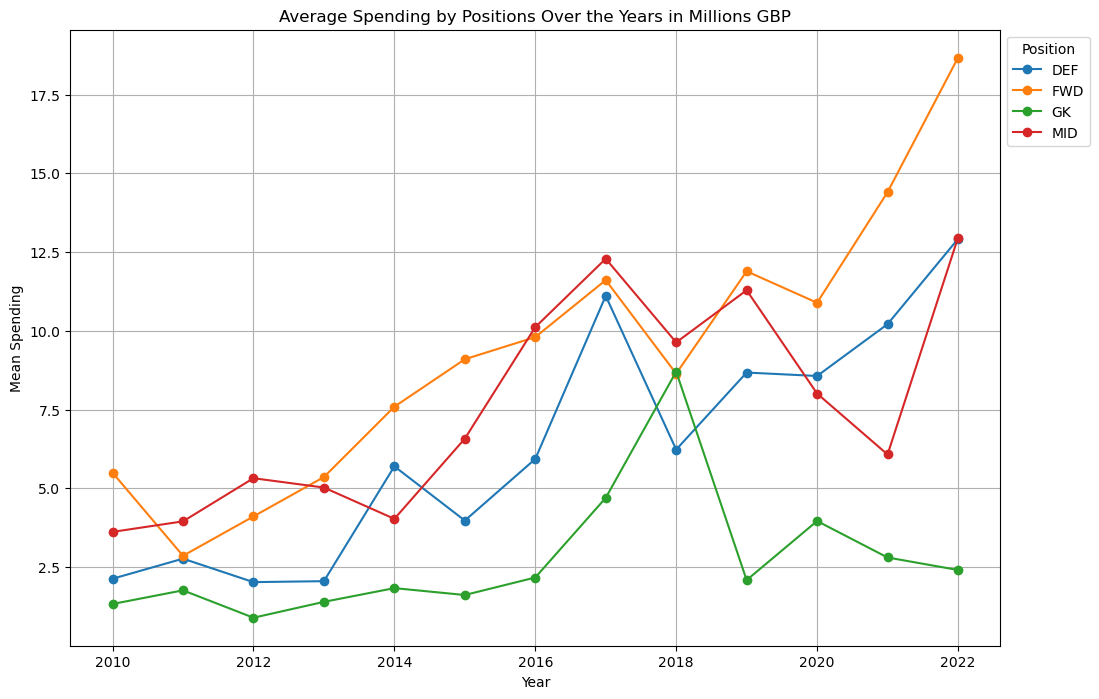

In [47]:
mean_spending = filtered_data.groupby(['year', 'positions_cleaned'])['fee_cleaned'].mean().unstack()

mean_spending.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Average Spending by Positions Over the Years in Millions GBP')
plt.xlabel('Year')
plt.ylabel('Mean Spending')
plt.legend(title='Position', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()

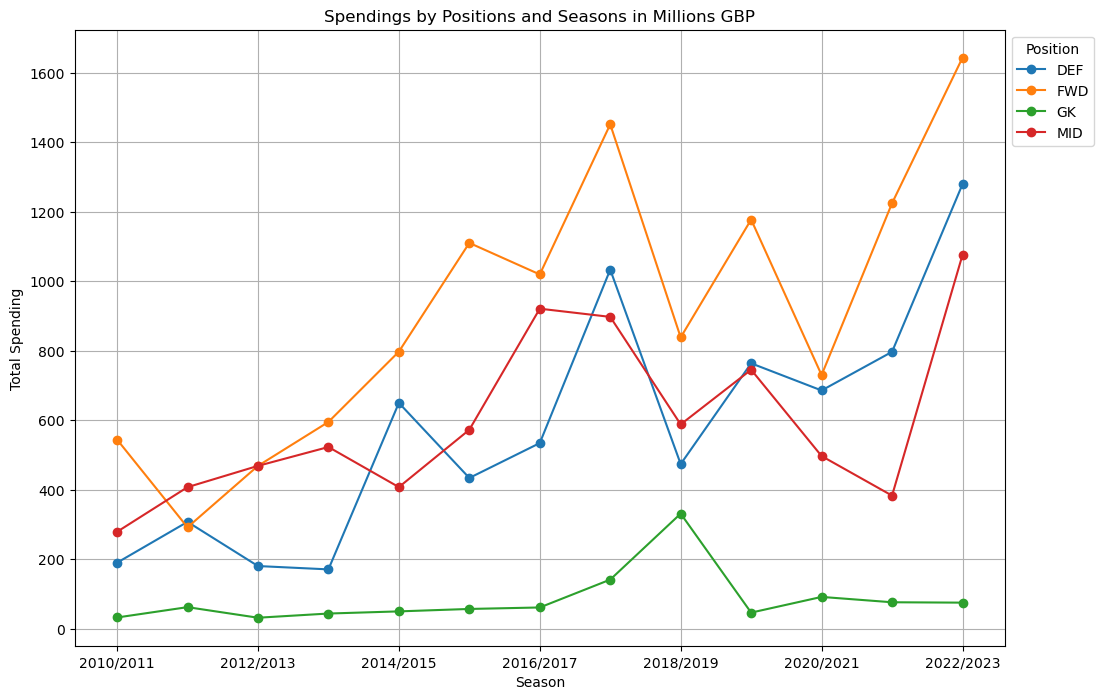

In [48]:
import matplotlib.pyplot as plt 

spending_by_position_season = filtered_data.groupby(['season', 'positions_cleaned'])['fee_cleaned'].sum().unstack()

spending_by_position_season.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Spendings by Positions and Seasons in Millions GBP')
plt.xlabel('Season')
plt.ylabel('Total Spending')
plt.legend(title='Position', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()
